In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import arviz as ar
import scipy.stats as sc

(array([6., 0., 0., 0., 0., 0., 0., 0., 0., 4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

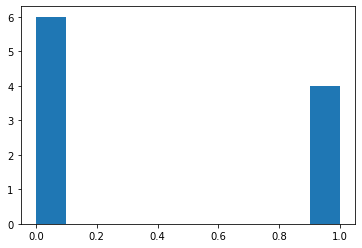

In [2]:
np.random.seed(244)

y=np.random.binomial(n=1, p=0.5,size=10) # Draw samples from a binomial distribution

                                         # Samples are drawn from a binomial distribution with specified
                                         # parameters, n trials and p probability of success where
                                         # n an integer >= 0 and p is in the interval [0,1]. (n may be
                                         # input as a float, but it is truncated to an integer in use)
                
# n, p = 10, .5  # number of trials, probability of each trial
# s = np.random.binomial(n, p, 1000)
# result of flipping a coin 10 times, tested 1000 times

plt.hist(y)

In [3]:
# np.random.binomial(n=1, p=0.5,size=10)

### https://medium.com/@aerinykim/beta-distribution-intuition-examples-and-derivation-cf00f4db57af

## Auswählen der a priori Verteilung: $f(\theta)$

### Beta Verteilung

$f(\theta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha-1}(1-\theta)^{\beta-1}, \quad 0\leq \theta\leq 1, \ \alpha,\beta >0$

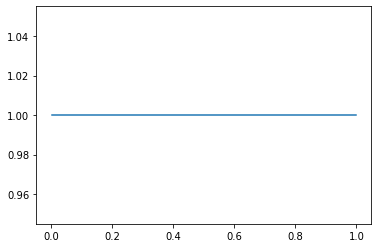

In [14]:
alpha=1
beta=1

theta=np.linspace(0.001,0.999, 1000) # ich weiß schon, dass theta in Beta Verteilung zwischen 0 und 1 ist

prior=sc.beta.pdf(theta,alpha,beta)

plt.plot(theta,sc.beta.pdf(theta,alpha,beta))

## Definieren der Likelihood: $f(y \mid \theta)$

### Bernoulli Verteilung
$f(y_1,\dots,y_n \mid \theta) = \theta^{\sum y_i} (1-\theta)^{n-\sum y_i}$

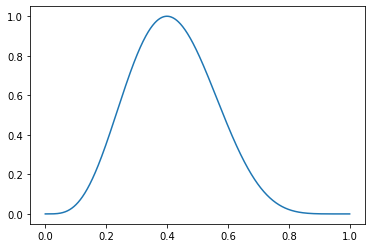

In [15]:
def bernoulli(x,theta):
    ones=np.sum(x)
    zeros=len(x)-ones
    return (theta**ones)*(1-theta)**zeros

likelihood=bernoulli(y,theta)
likelihood_scaled=likelihood*(1/np.max(likelihood)) # only for plotting purpose

plt.plot(theta,likelihood_scaled)

# Mittelwert von dieser Verteilung 0.47

## Berechnen der a posteriori Verteilung: $f(\theta \mid y)$

$$f(\theta \mid y) = \frac{f(y \mid \theta)f(\theta)}{f(y)}$$

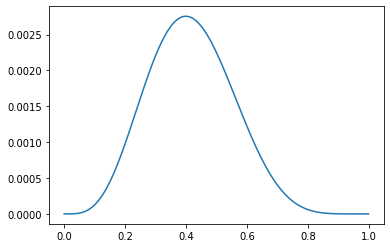

In [16]:
nominator= prior*likelihood # بسط

evidence=np.sum(nominator) #  هو مجموع البسط 

posterior=nominator/evidence 

plt.plot(theta,posterior)

# Mittelwert von dieser Verteilung ist auch 0.47

Text(0.5, 1.0, 'posterior')

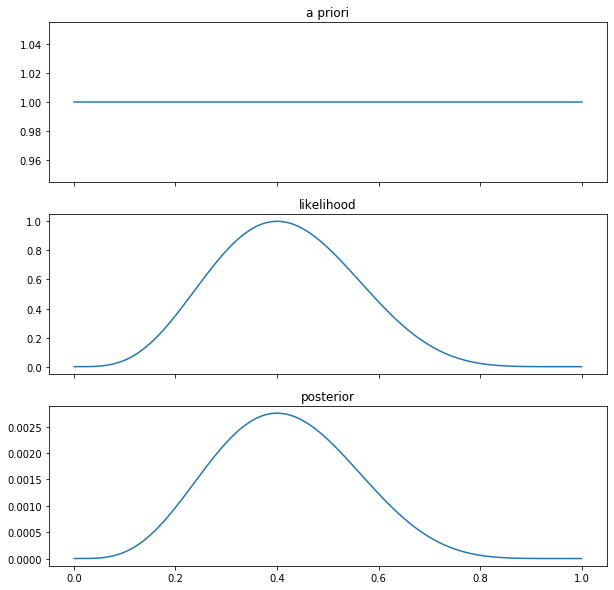

In [17]:
# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10,10))

ax1.plot(theta,sc.beta.pdf(theta,alpha,beta))
ax1.set_title('a priori')

ax2.plot(theta,likelihood_scaled)
ax2.set_title('likelihood')

ax3.plot(theta,posterior)
ax3.set_title('posterior')



## Berechnung der a posteriori mit Hilfe von Python

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
100%|██████████| 5500/5500 [00:04<00:00, 1350.52it/s]


           mean        sd  mc_error  hpd_2.5  hpd_97.5        n_eff      Rhat
theta  0.411769  0.140647  0.002184  0.14828  0.682799  4069.430878  1.000455


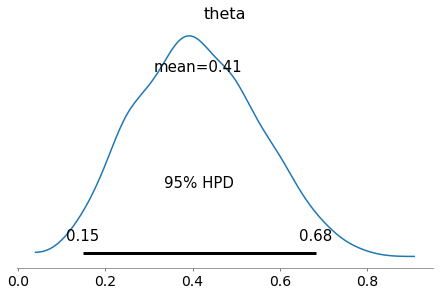

In [12]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with -statement
    # Define priors
    theta = pm.Beta('theta', alpha=alpha, beta=beta)
    # Define likelihood
    likelihood = pm.Binomial('y',n=1, p=theta, observed=y)
    # Inference!
    trace = pm.sample(5000, cores=1) # draw 5000 posterior samples using NUTS sampling
print(pm.summary(trace))



test=pm.plot_posterior(trace ,credible_interval =0.95)

## Analytische Lösung

### $\alpha_1=\alpha_0 +\sum y_i$
### $\beta_1=\beta_0+ n-\sum y_i$

## $E(\theta_1) = \frac{\alpha_1}{\alpha_1+\beta_1}$

In [13]:
alpha_posterior=alpha+np.sum(y)
beta_posterior=beta + len(y) -np.sum(y)
print('Analytical mean:' ,alpha_posterior/(alpha_posterior +beta_posterior))

Analytical mean: 0.4090909090909091
